In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
#librerias
import numpy as np
import matplotlib.pyplot as plt


**5.4 The diffraction limit of a telescope**

Our ability to resolve detail in astronomical observations is limited by the diffraction of light in our telescopes.  Light from stars can be treated effectively as coming from a point source at infinity.  When such light, with wavelength $\lambda$, passes through the circular aperture of a telescope (which we'll assume to have unit radius) and is focused by the telescope in the focal plane, it produces not a single dot, but a circular diffraction pattern consisting of central spot surrounded by a
series of concentric rings.  The intensity of the light in this diffraction pattern is given by

$I(r) = \biggl( {J_1(kr)\over kr} \biggr)^2$,


where $r$ is the distance in the focal plane from the center of thediffraction pattern, $k=2\pi/\lambda$, and $J_1(x)$ is a Bessel function. The Bessel functions $J_m(x)$ are given by

$J_m(x) = {1\over\pi} \int_0^\pi \cos(m\theta - x\sin\theta) \>d\theta$,

where $m$ is a nonnegative integer and $x\ge0$.

- Write a Python function $|J(m,x)|$ that calculates the value of $J_m(x)$ using Simpson's rule with $N=1000$ points.  Use your function in a program to make a plot, on a single graph, of the Bessel functions $J_0$, $J_1$, and $J_2$ as a function of $x$ from $x=0$ to $x=20$.
- Make a second program that makes a density plot of the intensity of the circular diffraction pattern of a point light source with $\lambda=500\,$nm, in a square region of the focal plane, using the formula given above.  Your picture should cover values of $r$ from zero up to about $1\,\mu$m.

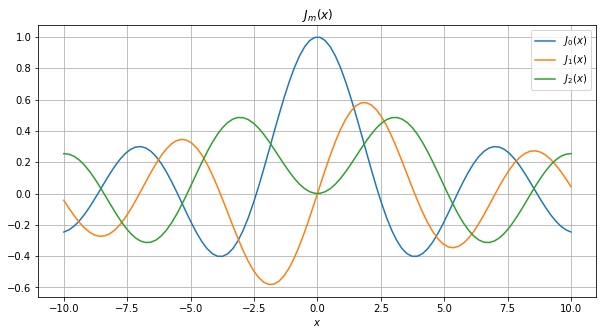

In [3]:
# define una función para hacer la integración de f (x) por cierto. a y b:
## metodo del simpson
def simps(f, N, a, b, args):
  if N % 2== 1:
    raise ValueError("N debe ser un número entero par." )
  dx = (b-a)/N
  x = np.linspace(a, b, N+1)
  y = f(x, args)
  S = dx/3 * np.sum(y[0:-1:2] + 4*y[1::2] + y[2::2])
  return S
#defino la funcion 
def func_(x, args):
  m, x0 = args
  return (1/np.pi)*np.cos(m*x-x0*np.sin(x))

N, a, b = 100, 0, np.pi #le damos valores a los limites de la integral

x0 = np.linspace(-10, 10, 100) #Devuelve números espaciados uniformemente en un intervalo especificado.
j_m_x = np.zeros(len(x0)) #Devuelve una nueva matriz de formas y tipos dados, con ceros.
fig, axs =plt.subplots(1, 1, figsize=(10, 5)) #Agrega una subtrama a la figura actual.
for m in range (3): #bublr para
  for i in range(len(x0)):
    args = m, x0[i]
    j_m_x[i] = simps(func_, N, a, b, args)
  axs.plot(x0,j_m_x) #hacemos la figura

axs.legend(("$J_{0}(x)$", "$J_{1}(x)$", "$J_{2}(x)$")) #le podemos nombre a cada J graficada
axs.set_title("$J_{m}(x)$") #podemos titulo a la grafica
axs.set_xlabel("$x$") #nombramos el eje 
axs.grid(True) #Configurar las líneas de la cuadrícula.

Text(0.5, 0, '$x$')

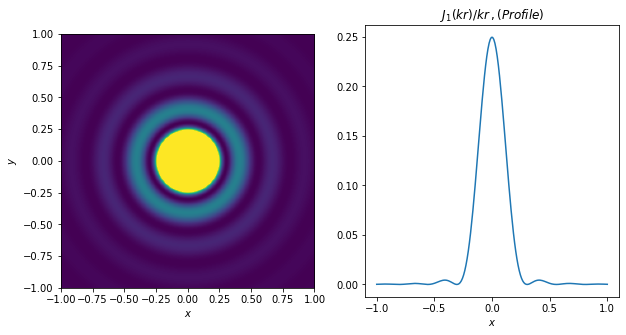

In [5]:
#parte b
##definimos otra funcion para J y aplicamos el metodo deseado de integracion
def J(m, X0):
  N, a, b = 100, 0, np.pi
  args = m, X0
  j_m_x = simps(func_, N, a, b, args)
  return j_m_x

#le damos valores 
lambda_ = 0.5
k = 2*np.pi/lambda_
L = 2
m = 1

x_0 = np.linspace(-L/2, L/2, 200) #Devuelve números espaciados uniformemente en un intervalo especificado.
y_0 = np.linspace(-L/2, L/2, 200)
x0, y0 = np.meshgrid(x_0,y_0)
r = np.sqrt(x0**2 + y0**2) #hacemos la operacion 
I = np.zeros((len(y_0),len(y_0))) #Devuelve una nueva matriz de formas y tipos dados, con ceros.

fig, axs = plt.subplots(1, 2, figsize=(10,5)) #Agrega una subtrama a la figura actual.

for i in range(len(x_0)):
  for j in range(len(y_0)):
    x0_ = k*r[i][j]
    args = m, x0_
    if r[i][j] == 0:
      I[j][i] = 1/4
    else:
      I[j][i] = (J(m,x0_)/x0_)**2
#axs[0].imshow(np.log(I),origin="lower",extent=[-L/2,L/2, -L/2,L/2],vmax=0.001)
axs[0].imshow(I,origin="lower",extent=[-L/2,L/2, -L/2,L/2],vmax=0.01) #procesa la grafica o la figura donde le da un origen y la da un limite de tamaño

#axs[0].imshow(I) # da el verdadero resultado de la grafica

#axs.set_title("$(\frac{J_{1}(kr)}{kr})^2$") #ponemos titulo a la primera grafica
axs[0].set_xlabel("$x$") #nombramos el eje x
axs[0].set_ylabel("$y$") #nombramos el eje y
#axs.grid(True)

kr = k*np.sqrt(x_0**2+y_0**2) #hacemos la operacion para poder graficar
#axs[1].plot(kr,I[int(len(x_0)/2), :])
axs[1].plot(x_0,I[int(len(x_0)/2), :]) # graficamos con respecto a x
axs[1].set_title("$J_{1}(kr)/kr \,, (Profile)$") #ponemos titulo a la segunda grafica
axs[1].set_xlabel("$x$") #nombramos el eje x
